<a href="https://colab.research.google.com/github/jaw039/Google-Colab-Notebooks/blob/main/CSE151_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Data Exploration

In [2]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])

In [3]:
display(x.shape)
display(w.shape)
display(y.shape)

(4, 1)

(1, 1)

(4, 1)

In [4]:
display(x)
display(w)
display(bias)
display(y)

array([[1],
       [0],
       [1],
       [0]])

array([[1.2]])

0.5

array([[0],
       [1],
       [0],
       [1]])

In [5]:
yhat = x@w+bias
yhat

array([[1.7],
       [0.5],
       [1.7],
       [0.5]])

In [6]:
## check our shape first
yhat.shape

(4, 1)

In [7]:
## element wise operation
yhat - y

array([[ 1.7],
       [-0.5],
       [ 1.7],
       [-0.5]])

In [8]:
## RSS
(yhat - y)**2  

array([[2.89],
       [0.25],
       [2.89],
       [0.25]])

In [9]:
## make it a scalar value with np.sum()
np.sum((yhat - y)**2)

np.float64(6.279999999999999)

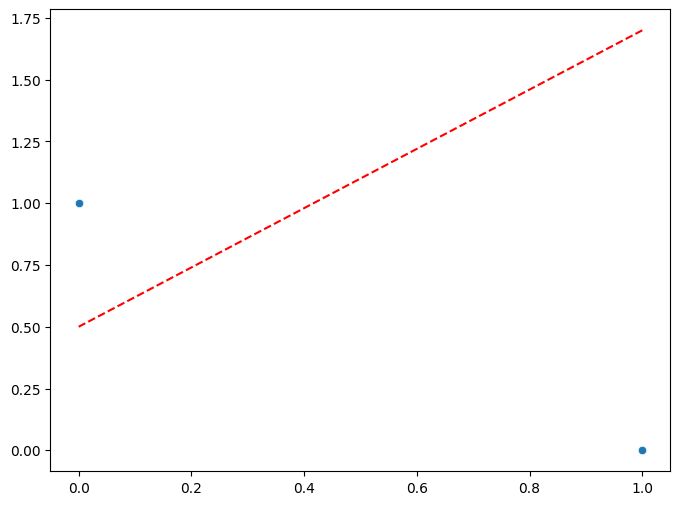

In [10]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot([x[0], x[-1]], [yhat[0], yhat[-1]], color='red',markerfacecolor='red',
             markersize=10,linestyle='dashed')

# Gradient Descent Code

In [11]:
def mse_loss_fxn(x, w, bias, y):
  yhat = x@w+bias
  if yhat.shape != y.shape:
    print('shape mismatch!')
  else:
    mse = np.sum((x @ w + bias - y)**2)/y.shape[0]
  return mse

In [12]:
def bias_derivative(x, w, bias, y):
  myderivative = np.sum(x @ w + bias - y)/y.shape[0] # x is a vector, w is a scalar and y is a vector
  return myderivative

In [ ]:
def dependent_var_derivative(x, w, bias, y):
  if x.shape[1] == 1:
    if len(w.shape) != 2:
      w = w.reshape(-1,1)
    myderivative = np.sum(x.T @ (x @ w + bias - y))/y.shape[0] # x is a vector, w is a scalar and y is a vector
    return myderivative
  else:
    print('x should be a vector of shape m,1 but found',xa.shape)

In [14]:
def gradient_descent_update_dep_var(x, w, bias, y, alpha):
  if len(w.shape) != 2:
      w = w.reshape(-1,1)
  w = w - alpha * (dependent_var_derivative(x, w, bias, y))
  return w
def gradient_descent_update_bias(x, w, bias, y, alpha):
  bias = bias - alpha * (bias_derivative(x, w, bias, y))
  return bias

# Testing our code

In [15]:
display(x)
display(w)
display(bias)
display(y)

array([[1],
       [0],
       [1],
       [0]])

array([[1.2]])

0.5

array([[0],
       [1],
       [0],
       [1]])

## 1st iteration

In [16]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.5699999999999998


In [17]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)

Our new w =  [[1.1915]]


In [18]:
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

Our new bias =  0.4940425


In [19]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.5485232555562498


## 2nd iter

In [20]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)

Our new w =  [[1.18307229]]


In [21]:
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

Our new bias =  0.4881867135625


In [22]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.5275297444031897


## 3rd iter

In [23]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

Our new w =  [[1.17471599]]
Our new bias =  0.48243126646440154


In [24]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.5070072159046326


## 4th iter

In [25]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

Our new w =  [[1.16643026]]
Our new bias =  0.4767748025187581


In [26]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.4869437361389235


## Let's loop it!

In [27]:
for i in range(0, 20):
  w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
  print('new bias =', bias)
  print('new MSE =', mse_loss_fxn(x, w, bias, y))
  print()

new w = [[1.15821423]]
new bias = 0.471215983339039
new MSE = 1.4673276796858534

new w = [[1.15006708]]
new bias = 0.46575348810647327
new MSE = 1.4481477216266692

new w = [[1.14198798]]
new bias = 0.4603860133404317
new MSE = 1.4293928297516472

new w = [[1.13397611]]
new bias = 0.455112272671809
new MSE = 1.4110522569698483

new w = [[1.12603067]]
new bias = 0.44993099661936536
new MSE = 1.3931155339158026

new w = [[1.11815086]]
new bias = 0.4448409323689903
new MSE = 1.375572461748021

new w = [[1.1103359]]
new bias = 0.4398408435558491
new MSE = 1.358413105134349

new w = [[1.10258501]]
new bias = 0.43492951004937547
new MSE = 1.3416277854193175

new w = [[1.09489744]]
new bias = 0.43010572774107236
new MSE = 1.325207073968771

new w = [[1.08727243]]
new bias = 0.4253683083350849
new MSE = 1.309141785687163

new w = [[1.07970922]]
new bias = 0.42071607914150855
new MSE = 1.2934229727030555

new w = [[1.0722071]]
new bias = 0.4161478828723976
new MSE = 1.278041918218436

new w = 

In [28]:
display(y)
yhat = x@w+bias
yhat

array([[0],
       [1],
       [0],
       [1]])

array([[1.39679728],
       [0.38249355],
       [1.39679728],
       [0.38249355]])

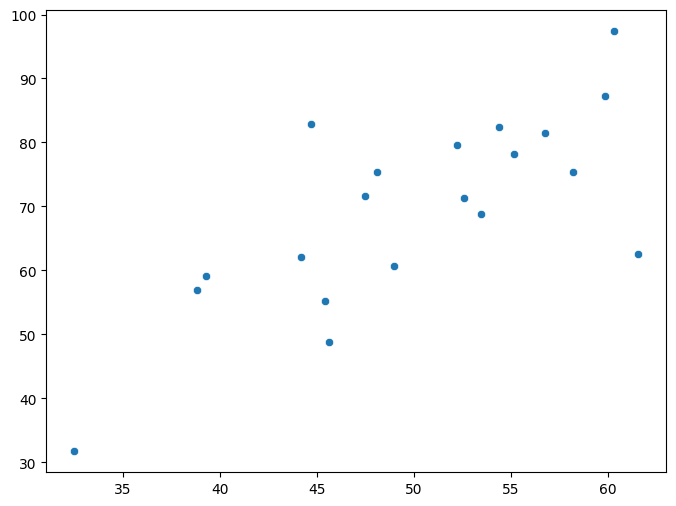

In [51]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot([x[0], x[-1]], [yhat[0], yhat[-1]], color='red',markerfacecolor='red',
             markersize=10,linestyle='dashed')

## Participation block

# Reinitialize, loop and plot

In [30]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.001

In [31]:
for i in range(0, 20):
  w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, mylr)
  print('new bias =', bias)
  print('new MSE =', mse_loss_fxn(x, w, bias, y))
  print()

new w = [[1.19915]]
new bias = 0.499400425
new MSE = 1.5678367403789304

new w = [[1.19830072]]
new bias = 0.49880187421260624
new MSE = 1.5656783964128553

new w = [[1.19745217]]
new bias = 0.49820434625164967
new MSE = 1.5635249555281574

new w = [[1.19660435]]
new bias = 0.49760783973278394
new MSE = 1.5613764051839971

new w = [[1.19575724]]
new bias = 0.4970123532734833
new MSE = 1.5592327328722309

new w = [[1.19491085]]
new bias = 0.4964178854930401
new MSE = 1.5570939261173218

new w = [[1.19406519]]
new bias = 0.4958244350125623
new MSE = 1.5549599724762575

new w = [[1.19322025]]
new bias = 0.49523200045497123
new MSE = 1.5528308595384632

new w = [[1.19237602]]
new bias = 0.49464058044499915
new MSE = 1.5507065749257178

new w = [[1.19153251]]
new bias = 0.4940501736091869
new MSE = 1.5485871062920686

new w = [[1.19068972]]
new bias = 0.49346077857588155
new MSE = 1.5464724413237474

new w = [[1.18984764]]
new bias = 0.492872393975234
new MSE = 1.5443625677390864

new w = [

In [32]:
display(y)
yhat = x@w+bias
yhat

array([[0],
       [1],
       [0],
       [1]])

array([[1.67133825],
       [0.48820153],
       [1.67133825],
       [0.48820153]])

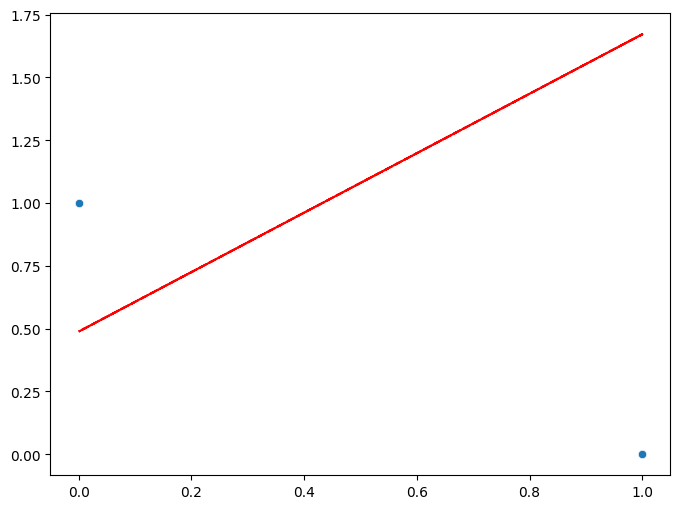

In [33]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

## Let's change our alpha

In [34]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
#w = np.array([[-0.62]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.01
iterations = 100

In [35]:
display(y)
yhat = x@w+bias
yhat

array([[0],
       [1],
       [0],
       [1]])

array([[1.7],
       [0.5],
       [1.7],
       [0.5]])

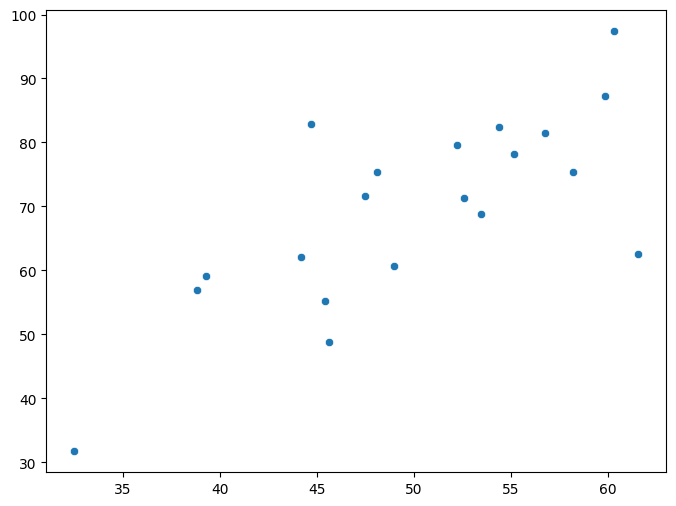

In [50]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

# Learning time!

In [37]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
#w = np.array([[-0.62]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.01
iterations = 100

weights = list()
cost = list()
biases  = list()
my_mse = mse_loss_fxn(x, w, bias, y)
print('Starting MSE =', my_mse)
cost.append(my_mse)
weights.append(w[0][0])
biases.append(bias)
for i in range(0, iterations):
  w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
  weights.append(w[0][0])
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, mylr)
  biases.append(bias)
  print('new bias =', bias)
  my_mse = mse_loss_fxn(x, w, bias, y)
  cost.append(my_mse)
  print('new MSE =', my_mse)
  print()

Starting MSE = 1.5699999999999998
new w = [[1.1915]]
new bias = 0.4940425
new MSE = 1.5485232555562498

new w = [[1.18307229]]
new bias = 0.4881867135625
new MSE = 1.5275297444031897

new w = [[1.17471599]]
new bias = 0.48243126646440154
new MSE = 1.5070072159046326

new w = [[1.16643026]]
new bias = 0.4767748025187581
new MSE = 1.4869437361389235

new w = [[1.15821423]]
new bias = 0.471215983339039
new MSE = 1.4673276796858534

new w = [[1.15006708]]
new bias = 0.46575348810647327
new MSE = 1.4481477216266692

new w = [[1.14198798]]
new bias = 0.4603860133404317
new MSE = 1.4293928297516472

new w = [[1.13397611]]
new bias = 0.455112272671809
new MSE = 1.4110522569698483

new w = [[1.12603067]]
new bias = 0.44993099661936536
new MSE = 1.3931155339158026

new w = [[1.11815086]]
new bias = 0.4448409323689903
new MSE = 1.375572461748021

new w = [[1.1103359]]
new bias = 0.4398408435558491
new MSE = 1.358413105134349

new w = [[1.10258501]]
new bias = 0.43492951004937547
new MSE = 1.34162

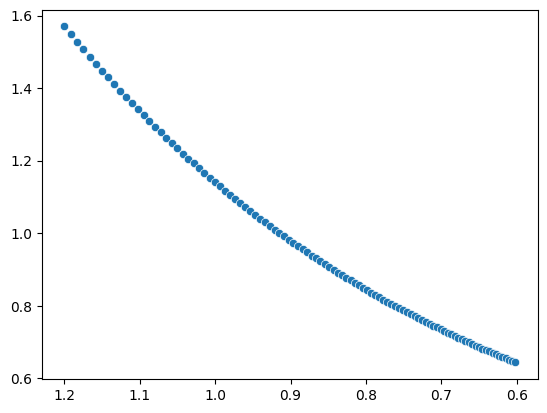

In [38]:
g = sns.scatterplot(y = cost, x = weights)
g.invert_xaxis()

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

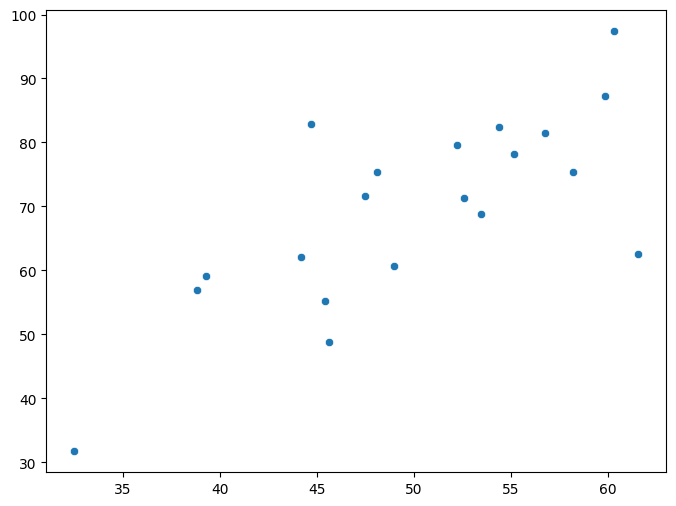

In [48]:
yhat = x@w+bias
display(yhat)
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

In [40]:
cost

[np.float64(1.5699999999999998),
 np.float64(1.5485232555562498),
 np.float64(1.5275297444031897),
 np.float64(1.5070072159046326),
 np.float64(1.4869437361389235),
 np.float64(1.4673276796858534),
 np.float64(1.4481477216266692),
 np.float64(1.4293928297516472),
 np.float64(1.4110522569698483),
 np.float64(1.3931155339158026),
 np.float64(1.375572461748021),
 np.float64(1.358413105134349),
 np.float64(1.3416277854193175),
 np.float64(1.325207073968771),
 np.float64(1.309141785687163),
 np.float64(1.2934229727030555),
 np.float64(1.278041918218436),
 np.float64(1.26299013051762),
 np.float64(1.2482593371315915),
 np.float64(1.233841479153739),
 np.float64(1.2197287057030781),
 np.float64(1.2059133685311123),
 np.float64(1.1923880167686205),
 np.float64(1.1791453918087331),
 np.float64(1.166178422322763),
 np.float64(1.153480219405342),
 np.float64(1.1410440718455153),
 np.float64(1.1288634415205185),
 np.float64(1.1169319589090578),
 np.float64(1.1052434187209899),
 np.float64(1.093791

In [41]:
weights

[np.float64(1.2),
 np.float64(1.1915),
 np.float64(1.1830722875),
 np.float64(1.1747159924946875),
 np.float64(1.166430256199892),
 np.float64(1.1582142309062988),
 np.float64(1.150067079835072),
 np.float64(1.1419879769953643),
 np.float64(1.1339761070436853),
 np.float64(1.126030665145108),
 np.float64(1.1181508568362857),
 np.float64(1.1103358978902593),
 np.float64(1.1025850141830287),
 np.float64(1.0948974415618666),
 np.float64(1.0872724257153519),
 np.float64(1.0797092220450997),
 np.float64(1.0722070955391667),
 np.float64(1.0647653206471088),
 np.float64(1.0573831811566712),
 np.float64(1.0500599700720865),
 np.float64(1.0427949894939645),
 np.float64(1.0355875505007484),
 np.float64(1.0284369730317182),
 np.float64(1.0213425857715241),
 np.float64(1.0143037260362258),
 np.float64(1.0073197396608191),
 np.float64(1.0003899808882333),
 np.float64(0.9935138122597754),
 np.float64(0.9866906045070065),
 np.float64(0.9799197364450288),
 np.float64(0.9732005948671666),
 np.float64(0

In [42]:
biases

[0.5,
 np.float64(0.4940425),
 np.float64(0.4881867135625),
 np.float64(0.48243126646440154),
 np.float64(0.4767748025187581),
 np.float64(0.471215983339039),
 np.float64(0.46575348810647327),
 np.float64(0.4603860133404317),
 np.float64(0.455112272671809),
 np.float64(0.44993099661936536),
 np.float64(0.4448409323689903),
 np.float64(0.4398408435558491),
 np.float64(0.43492951004937547),
 np.float64(0.43010572774107236),
 np.float64(0.4253683083350849),
 np.float64(0.42071607914150855),
 np.float64(0.4161478828723976),
 np.float64(0.4116625774404381),
 np.float64(0.40725903576025035),
 np.float64(0.4029361455522874),
 np.float64(0.3986928091492947),
 np.float64(0.39452794330529806),
 np.float64(0.3904404790070865),
 np.float64(0.386429361288158),
 np.float64(0.3824935490450953),
 np.float64(0.37863201485634024),
 np.float64(0.37484374480333565),
 np.float64(0.3711277382940034),
 np.float64(0.36748300788852833),
 np.float64(0.3639085791274179),
 np.float64(0.3604034903618079),
 np.floa

# New dataset!

In [66]:
# Dataset
x = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
              55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
              45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
              48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape(-1, 1)

y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
              78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
              55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
              60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]).reshape(-1, 1)

# Initialize parameters
w = np.random.randn(1, 1)
bias = np.random.randn()

# Hyperparameters
mylr = 0.00015
iterations = 10

<Axes: >

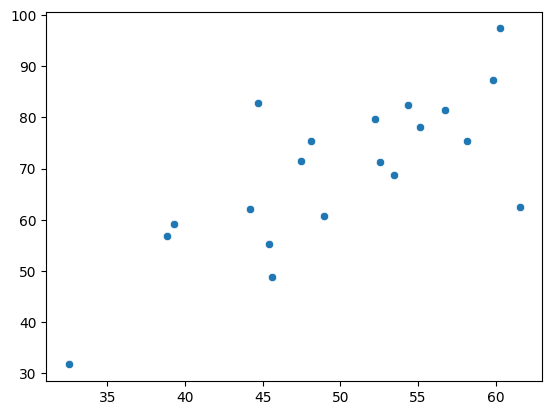

In [67]:
# plot me
sns.scatterplot(x=x.squeeze(), y=y.squeeze())

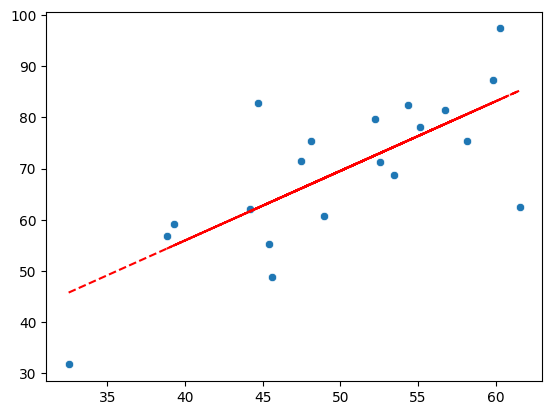

In [68]:
weights = list()
cost = list()
biases  = list()
my_mse = mse_loss_fxn(x, w, bias, y)
print('Starting MSE =', my_mse)
cost.append(my_mse)
weights.append(w[0][0])
biases.append(bias)
for i in range(0, iterations):
  for j in range(0, 5):
    w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
    #print('new w =', w)
    bias = gradient_descent_update_bias(x, w, bias, y, mylr)
    #print('new bias =', bias)
    print('new MSE =', mse_loss_fxn(x, w, bias, y))
    #print()
  yhat = x@w+bias
  clear_output(wait=True)
  plt.figure()
  sns.scatterplot(x=x.squeeze(), y=y.squeeze())
  plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead
  plt.show()

In [69]:
cost, my_mse

([np.float64(6524.34702907062)], np.float64(6524.34702907062))

## Let's do it again

In [46]:
# Dataset
x = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
              55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
              45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
              48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape(-1, 1)

y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
              78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
              55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
              60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]).reshape(-1, 1)

# Initialize parameters
w = np.random.randn(1, 1)
b = np.random.randn()

# Hyperparameters
learning_rate = 0.001
num_iterations = 1000

## Participation block

In [ ]:
import numpy as np

# Here's your dataset
np.random.seed(42)  # for reproducibility

# Generate some example data with a linear relationship
# True relationship: y = 2*x + 1 + noise
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([3.2, 5.1, 7.3, 8.9, 11.2, 12.8, 15.1, 16.9, 19.2, 20.8]).reshape(-1, 1)

# Your task: 
# Find the parameters w (weight) and b (bias) such that y ≈ w*x + b
# using gradient descent

# Initialize your parameters (you choose the starting values)
w = np.random.rand(1,1)  # weight
b = 0.0  # bias

# Set your hyperparameters
learning_rate = 0.01  # also called alpha
num_iterations = 1000

# Now implement gradient descent to find the optimal w and b
# Hint: You'll need to:
# 1. Make predictions: y_pred = w*x + b
# 2. Calculate the loss (MSE is common)
# 3. Calculate gradients for w and b
# 4. Update parameters using the gradients
# 5. Repeat for num_iterations

def mse_loss_fxn(x, w, bias, y):
    y_pred = x @ w + bias
    if y_pred.shape != y.shape:
        print('shape mismatch!')
    else:
        mse = np.sum((y_pred - y)**2) / y.shape[0]
    return mse

def calculate_gradients(x, w, bias, y):
    y_pred = x @ w + bias
    error = y_pred - y
    dw = (2 / y.shape[0]) * (x.T @ error)  # Gradient for w
    db = (2 / y.shape[0]) * np.sum(error)  # Gradient for b
    return dw, db

initial_loss = mse_loss_fxn(x, w, b, y)
print(f'Initial loss: {initial_loss}')
for i in range(num_iterations):
    # Make predictions
    y_pred = x @ w + b
    
    # Calculate loss
    loss = mse_loss_fxn(x, w, b, y)
    
    # Calculate gradients
    dw, db = calculate_gradients(x, w, b, y)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
    if i % 100 == 0:  # Print every 100 iterations
        print(f'Iteration {i}, Loss: {loss}, w: {w[0][0]}, b: {b}')

# Final lossprint(f'\nFinal parameters:')
print(f'w = {w[0][0]:.4f} (true value ≈ 2)')
print(f'b = {b:.4f} (true value ≈ 1)')
print(f'Final loss: {mse_loss_fxn(x, w, b, y):.4f}')



Initial loss: 120.86470875478597
Iteration 0, Loss: 120.86470875478597, w: 1.7369442273348932, b: 0.19980058692679012
Iteration 100, Loss: 0.10849009048052585, w: 2.0614296219619774, b: 0.5806980950103988
Iteration 200, Loss: 0.06030380958792346, w: 2.0305436685259237, b: 0.7957206165303612
Iteration 300, Loss: 0.039536130168382214, w: 2.0102671544260913, b: 0.9368821059565418
Iteration 400, Loss: 0.030585522225965965, w: 1.9969556979773881, b: 1.0295541012255005
Iteration 500, Loss: 0.026727923072953956, w: 1.988216776094007, b: 1.0903929230744367
Iteration 600, Loss: 0.02506534648362561, w: 1.9824797062265485, b: 1.1303333844104015
Iteration 700, Loss: 0.024348796939273533, w: 1.9787133410955484, b: 1.156554149429335
Iteration 800, Loss: 0.024039973121588162, w: 1.97624073632905, b: 1.1737679846025173
Iteration 900, Loss: 0.02390687395053753, w: 1.9746174804527166, b: 1.1850688036730337
w = 1.9736 (true value ≈ 2)
b = 1.1924 (true value ≈ 1)
Final loss: 0.0238


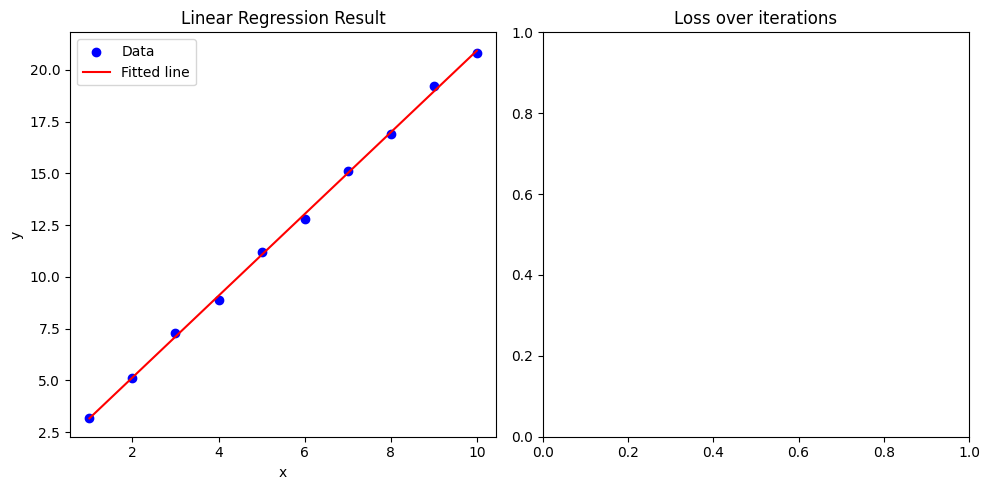

In [77]:
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(10, 5))

# Plot 1: Data and fitted line
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, x @ w + b, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Result')

# Plot 2: Loss over iterations (you'd need to track this)
plt.subplot(1, 2, 2)
# You could modify your loop to track losses in a list
plt.title('Loss over iterations')

plt.tight_layout()
plt.show()